In [1]:
!pip install unidecode

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load datasets to merge

In [3]:
general_file_path = '../files/01_csv'
csv_prefix = 'AnyConv.com__'

In [4]:
rech0_df = pd.read_csv(f'{general_file_path}/{csv_prefix}RECH0.csv') # HOGAR
rech23_df = pd.read_csv(f'{general_file_path}/{csv_prefix}RECH23.csv') # VIVIENDA
rech6_df = pd.read_csv(f'{general_file_path}/{csv_prefix}RECH6.csv') # NINHOS - ANEMIA

In [5]:
rech0_df.columns = [column.split(',')[0] for column in rech0_df.columns]
rech23_df.columns = [column.split(',')[0] for column in rech23_df.columns]
rech6_df.columns = [column.split(',')[0] for column in rech6_df.columns]

In [6]:
print(rech0_df.shape)
print(rech23_df.shape)
print(rech6_df.shape)

(37474, 44)
(37474, 131)
(22143, 41)


In [7]:
rech0_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID1,37474.0,2.019000e+03,0.000000e+00,2019.00000,2019.0,2019.0,2.019000e+03,2019.0
HHID,37474.0,1.615259e+08,9.412986e+07,100201.00000,78812301.0,162905451.0,2.420107e+08,325407401.0
HV001,37474.0,1.615194e+03,9.412991e+02,1.00000,788.0,1629.0,2.420000e+03,3254.0
HV002,37474.0,6.523915e+01,4.738893e+01,1.00000,27.0,57.0,9.500000e+01,397.0
HV002A,37474.0,1.024150e+00,1.871962e-01,1.00000,1.0,1.0,1.000000e+00,5.0
HV003,37474.0,1.584379e+00,1.004668e+00,0.00000,1.0,1.0,2.000000e+00,12.0
HV004,37474.0,1.615194e+03,9.412991e+02,1.00000,788.0,1629.0,2.420000e+03,3254.0
HV007,37474.0,2.019000e+03,0.000000e+00,2019.00000,2019.0,2019.0,2.019000e+03,2019.0
HV008,37474.0,1.434524e+03,3.440507e+00,1429.00000,1432.0,1435.0,1.438000e+03,1440.0
HV009,37474.0,3.828948e+00,2.154319e+00,0.00000,2.0,4.0,5.000000e+00,21.0


Longitud y latitud dedAF

In [8]:
rech23_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID1,37474.0,2.019000e+03,0.000000e+00,2019.0,2019.0,2019.0,2.019000e+03,2019.0
HHID,37474.0,1.615259e+08,9.412986e+07,100201.0,78812301.0,162905451.0,2.420107e+08,325407401.0
HV201,37474.0,2.118034e+01,2.361611e+01,0.0,11.0,11.0,1.200000e+01,96.0
HV202,37474.0,4.179191e+00,1.688977e+01,0.0,0.0,0.0,0.000000e+00,96.0
HV204,37474.0,7.602550e+02,4.211181e+02,0.0,996.0,996.0,9.960000e+02,998.0
...,...,...,...,...,...,...,...,...
SH227,37474.0,2.742381e+00,1.883817e+00,0.0,1.0,3.0,3.000000e+00,9.0
QH227A,37474.0,1.004510e+00,6.539273e-01,0.0,1.0,1.0,1.000000e+00,2.0
QH227B,37474.0,1.391685e+00,1.202574e+00,0.0,1.0,1.0,3.000000e+00,7.0
HV270,37474.0,2.311603e+00,1.444204e+00,0.0,1.0,2.0,3.000000e+00,5.0


In [9]:
# drop HV237H HV237H HV237I HV237I HV237J HV237J HV237K HV237K
rech23_df = rech23_df.drop(['HV237H', 'HV237H', 'HV237I', 'HV237I', 'HV237J', 'HV237J', 'HV237K', 'HV237K'], axis=1)

In [10]:
rech6_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID1,22143.0,2.019000e+03,0.000000e+00,2019.0,2019.0,2019.0,2019.0,2019.0
HHID,22143.0,1.632470e+08,9.417137e+07,100201.0,81209701.0,163212301.0,243007151.0,325407401.0
HC0,22143.0,4.577880e+00,1.717564e+00,2.0,3.0,4.0,5.0,19.0
HC1,22143.0,3.068536e+01,1.702367e+01,0.0,16.0,31.0,46.0,59.0
HC2,22143.0,2.499631e+02,1.085911e+03,21.0,101.0,129.0,157.0,9999.0
HC3,22143.0,9.846675e+02,1.024038e+03,430.0,770.0,892.0,984.0,9999.0
HC4,22143.0,3.284345e+03,2.746386e+03,0.0,920.5,2590.0,5179.0,9999.0
HC5,22143.0,8.854685e+01,1.245324e+03,-572.0,-133.0,-65.0,4.0,9999.0
HC6,22143.0,1.113201e+04,1.113773e+04,7695.0,9478.0,9745.0,10018.0,99999.0
HC7,22143.0,4.368666e+03,3.090251e+03,0.0,1544.0,3923.0,6924.0,9999.0


# Unique ID

In [11]:
rech6_df['HHID'] = rech6_df['HHID'].astype(str)
rech6_df['HC0'] = rech6_df['HC0'].astype(str)

In [12]:
rech6_df['UID'] = rech6_df['HHID'] + '-' + rech6_df['HC0']

# Merge

In [13]:
# to str hhid
rech0_df['HHID'] = rech0_df['HHID'].astype(str)
rech23_df['HHID'] = rech23_df['HHID'].astype(str)

rech0_df.drop('ID1', inplace=True, axis=1)
rech23_df.drop('ID1', inplace=True, axis=1)

In [14]:
# To check shapes (again)
print(rech0_df.shape)
print(rech23_df.shape)
print(rech6_df.shape)

(37474, 43)
(37474, 126)
(22143, 42)


In [15]:
full_df = rech6_df.merge(rech0_df, on = 'HHID')
full_df = full_df.merge(rech23_df, on = 'HHID')

In [16]:
full_df.shape

(22143, 209)

Merge with no exceptions

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22143 entries, 0 to 22142
Columns: 209 entries, ID1 to HV271
dtypes: float64(2), int64(202), object(5)
memory usage: 35.5+ MB


In [18]:
# list(full_df) #cols

In [19]:
# Raw joined dataset
datasets_path = '../files/03_datasets'

In [20]:
full_df.to_csv(f'{datasets_path}/raw_ninhos_anemia_hv.csv')

# Distribución anemia

In [21]:
full_df.HC55.value_counts(dropna=False)

0    20085
9     1679
4      229
6       81
3       69
Name: HC55, dtype: int64

In [22]:
full_df.HC53.value_counts(dropna=False)

999    2058
117     637
120     627
116     613
115     600
       ... 
65        1
176       1
75        1
179       1
67        1
Name: HC53, Length: 106, dtype: int64

In [23]:
1679 + 229 + 81 + 69 # Nulos se rellenan con 999

2058

In [24]:
full_df.HC56.value_counts(dropna=False)

999    2058
117     806
113     797
116     791
115     789
       ... 
56        1
65        1
61        1
62        1
151       1
Name: HC56, Length: 94, dtype: int64

In [25]:
full_df.HC57.value_counts(dropna=False) # Se rellna con 9 aquellos que no fueron medidos.

4    13671
3     4516
9     2058
2     1876
1       22
Name: HC57, dtype: int64

In [26]:
full_df_valid = full_df[full_df.HC55 == 0]
full_df_valid.shape

(20085, 209)

In [27]:
full_df_valid.HC57.value_counts(dropna=False, normalize=True)

4    0.680657
3    0.224844
2    0.093403
1    0.001095
Name: HC57, dtype: float64

In [28]:
full_df_valid.HC1.describe()

count    20085.000000
mean        33.004581
std         15.640300
min          6.000000
25%         20.000000
50%         33.000000
75%         47.000000
max         59.000000
Name: HC1, dtype: float64

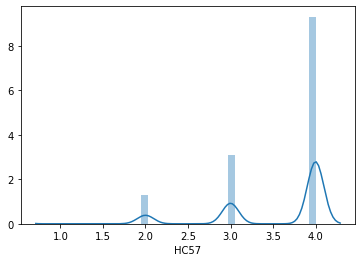

In [29]:
ax = sns.distplot(full_df_valid.HC57)

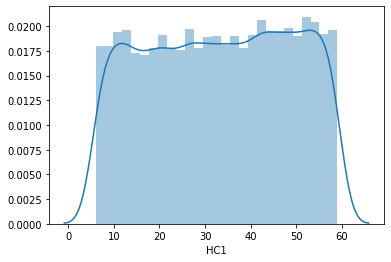

In [30]:
ax = sns.distplot(full_df_valid.HC1) # bastante uniforme en edades

In [31]:
full_df_valid.HC61.value_counts(dropna=False)

2    12709
1     3668
3     2809
9      582
0      317
Name: HC61, dtype: int64

In [32]:
full_df_valid.UBIGEO.value_counts(dropna=False) # (Departamento -Provincia - Distrito)

170101    434
240101    365
70106     336
180101    277
230110    273
         ... 
30714       1
190202      1
150612      1
150905      1
210306      1
Name: UBIGEO, Length: 891, dtype: int64

In [33]:
full_df_valid[['HV023','HV024']]

,HV023,HV024
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
22137,25,25
22138,25,25
22140,25,25
22141,25,25


In [34]:
full_df_valid[full_df_valid['HV023'] == full_df_valid['HV024']] # Misma columna

,ID1,HHID,HC0,HC1,HC2,HC3,HC4,HC5,HC6,HC7,...,SH78,SH79,SH224,SH225U,SH225,SH227,QH227A,QH227B,HV270,HV271
0,2019,100201,4,8,107,727,6511,39,10143,9519,...,1,20,4,2,16,1,1,1,4,1
1,2019,102801,4,52,182,1059,5504,13,10053,6540,...,0,0,4,1,37,1,2,1,4,1
2,2019,102801,5,18,93,790,2351,-72,9726,892,...,0,0,4,1,37,1,2,1,4,1
3,2019,104801,5,42,145,963,3002,-52,9792,3385,...,0,0,3,2,16,2,1,1,2,0
4,2019,113601,3,8,85,685,4210,-20,9922,6407,...,1,50,4,2,16,1,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22137,2019,325406001,3,32,136,918,4152,-21,9915,3826,...,1,20,4,1,96,3,1,3,1,-1
22138,2019,325406101,4,32,103,804,12,-303,8807,115,...,0,0,4,1,96,3,1,3,1,-2
22140,2019,325406201,4,42,150,932,947,-131,9479,4595,...,1,20,4,2,98,3,1,3,1,-2
22141,2019,325406301,6,41,185,983,4564,-11,9955,9363,...,1,5,3,1,96,3,1,3,1,-2


In [35]:
full_df_valid.drop('HV023',inplace=True, axis=1)

d:\users\dascencr\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
full_df_valid.shape

(20085, 208)

# To disk

In [37]:
full_df_valid.to_csv(f'{datasets_path}/filter_ninhos_anemia_hv.csv')

# Ordering and creating new column vars

In [38]:
full_df_valid.head()

,ID1,HHID,HC0,HC1,HC2,HC3,HC4,HC5,HC6,HC7,...,SH78,SH79,SH224,SH225U,SH225,SH227,QH227A,QH227B,HV270,HV271
0,2019,100201,4,8,107,727,6511,39,10143,9519,...,1,20,4,2,16,1,1,1,4,1
1,2019,102801,4,52,182,1059,5504,13,10053,6540,...,0,0,4,1,37,1,2,1,4,1
2,2019,102801,5,18,93,790,2351,-72,9726,892,...,0,0,4,1,37,1,2,1,4,1
3,2019,104801,5,42,145,963,3002,-52,9792,3385,...,0,0,3,2,16,2,1,1,2,0
4,2019,113601,3,8,85,685,4210,-20,9922,6407,...,1,50,4,2,16,1,1,1,5,1


## Loading the file with the headers and more

In [39]:
import re
from unicodedata import normalize
import copy
import json

In [40]:
csv_path = '../files/02_dictionaries/01_csv_load'

json_path = '../files/02_dictionaries/02_json_mapping'

### RECH0

In [42]:
info_rech0_df = pd.read_csv(f'{csv_path}/RECH0.csv', encoding = "ISO-8859-1", engine='python') # HOGAR

In [43]:
info_rech0_df

,Nº,VARIABLE,DESCRIPCIÓN DE LAS VARIABLES,TIPO DE CARÁCTER,LONGITUD,RANGO DE VARIACIÓN,VALORES,DESCRIPCIÓN DE LAS ALTERNATIVAS,OBS
0,1,ID1,Año,N,4.0,NaN,NaN,NaN,NaN
1,2,HHID,Identificacion Cuestionario del Hogar,AN,15.0,000100101:317599999,NaN,NaN,NaN
2,3,HV000,Código del país,A,3.0,PE6,NaN,NaN,NaN
3,4,HV001,Conglomerado,N,8.0,1:3175,NaN,NaN,NaN
4,5,HV002,Vivienda,N,4.0,1:9998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
104,40,NCONGLOME,Número de Conglomerado (proveniente del marco),NaN,NaN,NaN,NaN,NaN,NaN
105,41,CODCCPP,Codigo de Centro Poblado,AN,4.0,NaN,NaN,NaN,NaN
106,42,NOMCCPP,Nombre del Centro Poblado,AN,80.0,NaN,NaN,NaN,NaN
107,43,LONGITUDX,Longitud,N,13.0,NaN,NaN,NaN,NaN


In [44]:
def transform_spanish(s):
    s = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", s), 0, re.I
    )

    # -> NFC
    s = normalize( 'NFC', s)
    s = s.replace(u"ñ","nh")
    s = s.lower()
    s = s.replace(" ","_")
    return s

In [45]:
info_rech0_df["DESC_CLEAN"] = info_rech0_df["DESCRIPCIÓN DE LAS VARIABLES"].apply(lambda x: transform_spanish(x))

In [46]:
info_rech0_df

,Nº,VARIABLE,DESCRIPCIÓN DE LAS VARIABLES,TIPO DE CARÁCTER,LONGITUD,RANGO DE VARIACIÓN,VALORES,DESCRIPCIÓN DE LAS ALTERNATIVAS,OBS,DESC_CLEAN
0,1,ID1,Año,N,4.0,NaN,NaN,NaN,NaN,anho
1,2,HHID,Identificacion Cuestionario del Hogar,AN,15.0,000100101:317599999,NaN,NaN,NaN,identificacion_cuestionario_del_hogar
2,3,HV000,Código del país,A,3.0,PE6,NaN,NaN,NaN,codigo_del_pais
3,4,HV001,Conglomerado,N,8.0,1:3175,NaN,NaN,NaN,conglomerado
4,5,HV002,Vivienda,N,4.0,1:9998,NaN,NaN,NaN,vivienda
...,...,...,...,...,...,...,...,...,...,...
104,40,NCONGLOME,Número de Conglomerado (proveniente del marco),NaN,NaN,NaN,NaN,NaN,NaN,numero_de_conglomerado_(proveniente_del_marco)
105,41,CODCCPP,Codigo de Centro Poblado,AN,4.0,NaN,NaN,NaN,NaN,codigo_de_centro_poblado
106,42,NOMCCPP,Nombre del Centro Poblado,AN,80.0,NaN,NaN,NaN,NaN,nombre_del_centro_poblado
107,43,LONGITUDX,Longitud,N,13.0,NaN,NaN,NaN,NaN,longitud


In [47]:
group_info_rech0 = info_rech0_df.groupby(by=["VARIABLE"])

In [48]:
dict_mapping = {}
for index, df in group_info_rech0:
    if df['VALORES'].isnull().all() == False:
        print(index)
        #print(df['DESC_CLEAN'])
        new_key = df['DESC_CLEAN'].values[0]
        print(new_key)
        dict_valor = {}
        for sub_index, valor, desc in df[['VALORES','DESCRIPCIÓN DE LAS ALTERNATIVAS']].itertuples():
            dict_valor[int(valor)] = desc      
        dict_mapping[new_key] = copy.deepcopy(dict_valor)

HV015
resultado_de_la_entrevista_en_el_hogar
HV023
dominio
HV024
region
HV025
area_de_residencia
HV026
lugar_de_residencia
HV027
seleccion_para_hombre/esposo
HV042
seleccion_para_medicion_de__hemoglobina
HV043
hogares_seleccionados_para_el_modulo_de_mujeres_de_estado
HV044
seleccion_para_el_modulo_de_violencia_familiar


In [49]:
dict_mapping

{'resultado_de_la_entrevista_en_el_hogar': {1: 'Completo',
  2: 'Hogar presente pero entrevistado ausente',
  3: 'Hogar ausente',
  4: 'Aplazada',
  5: 'Rechazada',
  6: 'Vivienda desocupada o no es vivienda',
  7: 'Vivienda destruida',
  8: 'Vivienda no encontrada',
  9: 'Otro'},
 'dominio': {1: 'Amazonas',
  2: 'Ancash',
  3: 'Apurimac',
  4: 'Arequipa',
  5: 'Ayacucho',
  6: 'Cajamarca',
  7: 'Callao',
  8: 'Cusco',
  9: 'Huancavelica',
  10: 'Huanuco',
  11: 'Ica',
  12: 'Junin',
  13: 'La Libertad',
  14: 'Lambayeque',
  15: 'Lima',
  16: 'Loreto',
  17: 'Madre de Dios',
  18: 'Moquegua',
  19: 'Pasco',
  20: 'Piura',
  21: 'Puno',
  22: 'San Martin',
  23: 'Tacna',
  24: 'Tumbes',
  25: 'Ucayali'},
 'region': {1: 'Amazonas',
  2: 'Ancash',
  3: 'Apurimac',
  4: 'Arequipa',
  5: 'Ayacucho',
  6: 'Cajamarca',
  7: 'Callao',
  8: 'Cusco',
  9: 'Huancavelica',
  10: 'Huanuco',
  11: 'Ica',
  12: 'Junin',
  13: 'La Libertad',
  14: 'Lambayeque',
  15: 'Lima',
  16: 'Loreto',
  17: 'Ma

In [50]:
with open(f'{json_path}/RECH0/labels.json', 'w') as fp:
    json.dump(dict_mapping, fp)

### New columns

In [51]:
info_rech0_df[['VARIABLE','DESC_CLEAN']]

,VARIABLE,DESC_CLEAN
0,ID1,anho
1,HHID,identificacion_cuestionario_del_hogar
2,HV000,codigo_del_pais
3,HV001,conglomerado
4,HV002,vivienda
...,...,...
104,NCONGLOME,numero_de_conglomerado_(proveniente_del_marco)
105,CODCCPP,codigo_de_centro_poblado
106,NOMCCPP,nombre_del_centro_poblado
107,LONGITUDX,longitud


In [52]:
columns_mapping_df = info_rech0_df[['VARIABLE','DESC_CLEAN']].drop_duplicates(keep = 'first') 

In [53]:
dict_columnas = {}
for sub_index, valor, desc in columns_mapping_df.itertuples():
    dict_columnas[valor] = desc  

In [54]:
dict_columnas

{'ID1': 'anho',
 'HHID': 'identificacion_cuestionario_del_hogar',
 'HV000': 'codigo_del_pais',
 'HV001': 'conglomerado',
 'HV002': 'vivienda',
 'HV002A': 'hogar',
 'HV003': 'numero_de_orden_del_informante_del_cuestionario_del_hogar',
 'HV004': 'unidad_ultima_de_muestreo',
 'HV007': 'anho_de_entrevista',
 'HV008': 'fecha_de_entrevista_meses_(cmc)',
 'HV009': 'total_de_personas_en_el_hogar',
 'HV010': 'numero_de_mujeres_elegibles_para_entrevista_individual',
 'HV011': 'numero_de_hombres_elegibles_por_hogar',
 'HV012': 'numero_de_miembros_de_jure_(residentes_habituales)',
 'HV013': 'numero_de_miembros_de_facto_(personas_que_durmieron_la_noche_anterior)',
 'HV014': 'numero_de_ninhos_menores_de_5_anhos',
 'HV015': 'resultado_de_la_entrevista_en_el_hogar',
 'HV017': 'numero_de_visitas',
 'HV020': 'muestra_de_alguna_vez_en_union',
 'HV021': 'unidad_de_muestreo_primario_(conglomerado)',
 'HV023': 'dominio',
 'HV024': 'region',
 'HV025': 'area_de_residencia',
 'HV026': 'lugar_de_residencia',
 '

In [55]:
with open(f'{json_path}/RECH0/columns.json', 'w') as fp:
    json.dump(dict_columnas, fp)

## Getting columns and labels fast for other 3 datasetsm

## RECH23

In [56]:
info_rech23_df = pd.read_csv(f'{csv_path}/RECH23.csv', encoding = "ISO-8859-1", engine='python') # VIVIENDA

In [57]:
info_rech23_df.head().T

,0,1,2,3,4
Nº,1,2,3,3,3
VARIABLE,ID1,HHID,HV201,HV201,HV201
DESCRIPCIÓN DE LAS VARIABLES,Año,Identificacion Cuestionario del Hogar,¿Cuál es la fuente principal de abastecimiento...,¿Cuál es la fuente principal de abastecimiento...,¿Cuál es la fuente principal de abastecimiento...
TIPO DE CARÁCTER,N,AN,N,N,N
LONGITUD,4,15,2,2,2
RANGO DE VARIACIÓN,NaN,000100101:317599999,"11:13, 21:22, 41, 43, 51, 61, 71, 96","11:13, 21:22, 41, 43, 51, 61, 71, 96","11:13, 21:22, 41, 43, 51, 61, 71, 96"
VALORES,NaN,NaN,11,12,13
DESCRIPCIÓN DE LAS ALTERNATIVAS,NaN,NaN,Dentro de la vivienda,"Fuera de la vivienda, pero dentro del edificio",Pilón/Grifo público
OBS,NaN,NaN,NaN,NaN,NaN


In [58]:
info_rech23_df["DESC_CLEAN"] = info_rech23_df["DESCRIPCIÓN DE LAS VARIABLES"].apply(lambda x: transform_spanish(x))

In [59]:
info_rech23_df.head().T

,0,1,2,3,4
Nº,1,2,3,3,3
VARIABLE,ID1,HHID,HV201,HV201,HV201
DESCRIPCIÓN DE LAS VARIABLES,Año,Identificacion Cuestionario del Hogar,¿Cuál es la fuente principal de abastecimiento...,¿Cuál es la fuente principal de abastecimiento...,¿Cuál es la fuente principal de abastecimiento...
TIPO DE CARÁCTER,N,AN,N,N,N
LONGITUD,4,15,2,2,2
RANGO DE VARIACIÓN,NaN,000100101:317599999,"11:13, 21:22, 41, 43, 51, 61, 71, 96","11:13, 21:22, 41, 43, 51, 61, 71, 96","11:13, 21:22, 41, 43, 51, 61, 71, 96"
VALORES,NaN,NaN,11,12,13
DESCRIPCIÓN DE LAS ALTERNATIVAS,NaN,NaN,Dentro de la vivienda,"Fuera de la vivienda, pero dentro del edificio",Pilón/Grifo público
OBS,NaN,NaN,NaN,NaN,NaN
DESC_CLEAN,anho,identificacion_cuestionario_del_hogar,¿cual_es_la_fuente_principal_de_abastecimiento...,¿cual_es_la_fuente_principal_de_abastecimiento...,¿cual_es_la_fuente_principal_de_abastecimiento...


In [60]:
group_info_rech23 = info_rech23_df.groupby(by=["VARIABLE"])

In [61]:
dict_mapping = {}
for index, df in group_info_rech23:
    if df['VALORES'].isnull().all() == False:
        print(index)
        #print(df['DESC_CLEAN'])
        new_key = df['DESC_CLEAN'].values[0]
        print(new_key)
        dict_valor = {}
        for sub_index, valor, desc in df[['VALORES','DESCRIPCIÓN DE LAS ALTERNATIVAS']].itertuples():
            dict_valor[int(valor)] = desc      
        dict_mapping[new_key] = copy.deepcopy(dict_valor)

HV201
¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_para_tomar_o_beber?
HV202
¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_en_su_hogar?
HV204
¿cuanto_tiempo_se_demora_en_ir,_recoger_agua_y_volver?
HV205
¿que_tipo_de_servicio_higienico_tiene_su_hogar?
HV206
¿tiene_electricidad_en_su_hogar?
HV207
su_hogar_¿tiene_radio?
HV208
su_hogar_¿tiene_televisor?
HV209
su_hogar_¿tiene_refrigeradora_/congeladora?
HV210
algun_miembro_de_su_hogar_¿tiene_bicleta/triciclo?
HV211
algun_miembro_de_su_hogar_¿tiene_motocileta/_motokar?
HV212
algun_miembro_de_su_hogar_¿tiene_carro_o_camion?
HV213
material_predominante_del_piso_de_la_vivienda
HV214
material_predominante_de_las_paredes_exteriores_de_la_vivienda
HV215
material_predominante_del_techo_de_la_vivienda
HV217
estructura_de_relaciones_en_el_hogar_(composicion_de_los_hogares)
HV219
sexo_del_jefe_de_hogar
HV221
su_hogar_¿tiene_telefono?
HV225
¿el_servicio_higienico_es_compartido_con_otros_hogares?
HV226
¿cual_es_el_combustible_que_util

In [62]:
dict_mapping

{'¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_para_tomar_o_beber?': {11: 'Dentro de la vivienda',
  12: 'Fuera de la vivienda, pero dentro del edificio',
  13: 'Pilón/Grifo público',
  21: 'Pozo en la vivineda/patio/lote',
  22: 'Pozo público',
  41: 'Manantial (puquio)',
  43: 'Río/acequia/laguna',
  51: 'Agua de lluvia',
  61: 'Camión cisterna',
  71: 'Agua embotellada',
  96: 'Otro'},
 '¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_en_su_hogar?': {11: 'Dentro de la vivienda',
  12: 'Fuera de la vivienda, pero dentro del edificio',
  13: 'Pilón/Grifo público',
  21: 'Pozo en la vivineda/patio/lote',
  22: 'Pozo público',
  41: 'Manantial (puquio)',
  43: 'Río/acequia/laguna',
  51: 'Agua de lluvia',
  61: 'Camión cisterna',
  96: 'Otro'},
 '¿cuanto_tiempo_se_demora_en_ir,_recoger_agua_y_volver?': {996: 'En las instalaciones',
  998: 'No sabe'},
 '¿que_tipo_de_servicio_higienico_tiene_su_hogar?': {11: 'Dentro de la vivienda',
  12: 'Fuera de la vivienda, pero dentr

In [63]:
columns_mapping_df = info_rech23_df[['VARIABLE','DESC_CLEAN']].drop_duplicates(keep = 'first') 

In [64]:
columns_mapping_df

,VARIABLE,DESC_CLEAN
0,ID1,anho
1,HHID,identificacion_cuestionario_del_hogar
2,HV201,¿cual_es_la_fuente_principal_de_abastecimiento...
13,HV202,¿cual_es_la_fuente_principal_de_abastecimiento...
23,HV204,"¿cuanto_tiempo_se_demora_en_ir,_recoger_agua_y..."
...,...,...
403,SH227,prueba_de_cloro
409,QH227A,la_muestra_fue_tomada_por:
411,QH227B,la_nuestra_del_agua_se_extrajo_del:
417,HV270,indice_de_riqueza


In [65]:
dict_columnas = {}
for sub_index, valor, desc in columns_mapping_df.itertuples():
    dict_columnas[valor] = desc  

In [66]:
dict_columnas

{'ID1': 'anho',
 'HHID': 'identificacion_cuestionario_del_hogar',
 'HV201': '¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_para_tomar_o_beber?',
 'HV202': '¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_en_su_hogar?',
 'HV204': '¿cuanto_tiempo_se_demora_en_ir,_recoger_agua_y_volver?',
 'HV205': '¿que_tipo_de_servicio_higienico_tiene_su_hogar?',
 'HV206': '¿tiene_electricidad_en_su_hogar?',
 'HV207': 'su_hogar_¿tiene_radio?',
 'HV208': 'su_hogar_¿tiene_televisor?',
 'HV209': 'su_hogar_¿tiene_refrigeradora_/congeladora?',
 'HV210': 'algun_miembro_de_su_hogar_¿tiene_bicleta/triciclo?',
 'HV211': 'algun_miembro_de_su_hogar_¿tiene_motocileta/_motokar?',
 'HV212': 'algun_miembro_de_su_hogar_¿tiene_carro_o_camion?',
 'HV213': 'material_predominante_del_piso_de_la_vivienda',
 'HV214': 'material_predominante_de_las_paredes_exteriores_de_la_vivienda',
 'HV215': 'material_predominante_del_techo_de_la_vivienda',
 'HV216': 'numero_de_habitaciones_utilizadas_para_dormir',
 'HV217': 

## Dump 23

In [67]:
with open(f'{json_path}/RECH23/labels.json', 'w') as fp:
    json.dump(dict_mapping, fp)

In [68]:
with open(f'{json_path}/RECH23/columns.json', 'w') as fp:
    json.dump(dict_columnas, fp)

## RECH6

In [69]:
info_rech6_df = pd.read_csv(f'{csv_path}/RECH6.csv', encoding = "ISO-8859-1", engine='python') # NIHNOS - ANEMIA

In [70]:
info_rech6_df.head().T

,0,1,2,3,4
Nº,1,2,3,4,5
VARIABLE,ID1,HHID,HC0,HC1,HC2
DESCRIPCIÓN DE LAS VARIABLES,Año,Identificación Cuestionario Individual,Número de orden en el hogar,Edad en meses,Peso en kilogramos (1 dec.)
TIPO DE CARÁCTER,N,AN,N,N,N
LONGITUD,4,18,2,2,4
RANGO DE VARIACIÓN,NaN,NaN,NaN,0:59,15:500
VALORES,NaN,NaN,NaN,NaN,NaN
DESCRIPCIÓN DE LAS ALTERNATIVAS,NaN,NaN,NaN,NaN,NaN
OBS,NaN,NaN,NaN,NaN,NaN


## All the process

In [71]:
# Transform descriptions
info_rech6_df["DESC_CLEAN"] = info_rech6_df["DESCRIPCIÓN DE LAS VARIABLES"].apply(lambda x: transform_spanish(x))
# Group mappings
group_info_rech6 = info_rech6_df.groupby(by=["VARIABLE"])

# Create dict of mappings
dict_mapping = {}
for index, df in group_info_rech6:
    if df['VALORES'].isnull().all() == False:
        print(index)
        #print(df['DESC_CLEAN'])
        new_key = df['DESC_CLEAN'].values[0]
        print(new_key)
        dict_valor = {}
        for sub_index, valor, desc in df[['VALORES','DESCRIPCIÓN DE LAS ALTERNATIVAS']].itertuples():
            dict_valor[int(valor)] = desc      
        dict_mapping[new_key] = copy.deepcopy(dict_valor)

# idcolumns and decs columns
columns_mapping_df = info_rech6_df[['VARIABLE','DESC_CLEAN']].drop_duplicates(keep = 'first')

# For the columns
dict_columnas = {}
for sub_index, valor, desc in columns_mapping_df.itertuples():
    dict_columnas[valor] = desc  
    
# Save
with open(f'{json_path}/RECH6/labels.json', 'w') as fp:
    json.dump(dict_mapping, fp)

print("Labels saved")
    
with open(f'{json_path}/RECH6/columns.json', 'w') as fp:
    json.dump(dict_columnas, fp)
    
print("Columns saved")

HC10
peso/talla_percentil
HC11
peso/talla_desviacion_estandar
HC12
peso/talla_porcentaje_de_la_mediana_de_referencia
HC13
razon_por_la_cual_el_ninho_no_se_midio
HC15
el_ninho_se_midio_acostado_o_de_pie
HC27
sexo
HC4
talla/edad_percentil
HC5
talla/edad_desviacion_estandar
HC52
leyo_la_declaracion_de_consentimiento
HC55
resultado_de_medir_(hemoglobina)
HC57
nivel_de_anemia
HC6
talla/edad_porcentaje_de_la_mediana_de_referencia
HC60
numero_de_orden_de_la_madre_en_el_hogar
HC61
el_nivel_educativo_mas_alto_de_la_madre
HC68
nivel_educativo_mas_alto_(cs_para_informe_preliminar_y_final)
HC7
peso/edad_percentil
HC70
talla/edad_de_la_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)
HC71
peso/edad_de_la_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)
HC72
peso/talla_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)
HC73
desviacion_estandar_del_imc_(segun_la_oms)
HC8
peso/edad_desviacion_estandar
HC9
peso/edad_porcentaje_de_la_mediana_de_referencia
Labels s

# Using the labels and columns to create a new complete dataframe

In [72]:
with open(f'{json_path}/RECH0/columns.json') as json_file:
    columns_rech0_dict = json.load(json_file)

with open(f'{json_path}/RECH23/columns.json') as json_file:
    columns_rech23_dict = json.load(json_file)

with open(f'{json_path}/RECH6/columns.json') as json_file:
    columns_rech6_dict = json.load(json_file)
    

In [73]:
with open(f'{json_path}/RECH0/labels.json') as json_file:
    labels_rech0_dict = json.load(json_file)
with open(f'{json_path}/RECH23/labels.json') as json_file:
    labels_rech23_dict = json.load(json_file)
with open(f'{json_path}/RECH6/labels.json') as json_file:
    labels_rech6_dict = json.load(json_file)
    

### Creating new columns with details

In [74]:
original_raw_joined_df = pd.read_csv(f'{datasets_path}/raw_ninhos_anemia_hv.csv')
original_raw_joined_df = original_raw_joined_df.drop(original_raw_joined_df.columns[0], axis=1) #olvide quitarle el index lol

In [75]:
original_raw_joined_df.head()

,ID1,HHID,HC0,HC1,HC2,HC3,HC4,HC5,HC6,HC7,...,SH78,SH79,SH224,SH225U,SH225,SH227,QH227A,QH227B,HV270,HV271
0,2019,100201,4,8,107,727,6511,39,10143,9519,...,1,20,4,2,16,1,1,1,4,1
1,2019,102801,4,52,182,1059,5504,13,10053,6540,...,0,0,4,1,37,1,2,1,4,1
2,2019,102801,5,18,93,790,2351,-72,9726,892,...,0,0,4,1,37,1,2,1,4,1
3,2019,104801,5,42,145,963,3002,-52,9792,3385,...,0,0,3,2,16,2,1,1,2,0
4,2019,113601,3,8,85,685,4210,-20,9922,6407,...,1,50,4,2,16,1,1,1,5,1


In [76]:
original_raw_joined_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22143 entries, 0 to 22142
Data columns (total 209 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID1        int64  
 1   HHID       int64  
 2   HC0        int64  
 3   HC1        int64  
 4   HC2        int64  
 5   HC3        int64  
 6   HC4        int64  
 7   HC5        int64  
 8   HC6        int64  
 9   HC7        int64  
 10  HC8        int64  
 11  HC9        int64  
 12  HC10       int64  
 13  HC11       int64  
 14  HC12       int64  
 15  HC13       int64  
 16  HC15       int64  
 17  HC16       int64  
 18  HC19       int64  
 19  HC27       int64  
 20  HC30       int64  
 21  HC31       int64  
 22  HC32       int64  
 23  HC33       int64  
 24  HC51       int64  
 25  HC52       int64  
 26  HC53       int64  
 27  HC55       int64  
 28  HC56       int64  
 29  HC57       int64  
 30  HC58       int64  
 31  HC60       int64  
 32  HC61       int64  
 33  HC62       int64  
 34  HC63       int64  
 3

### Replacing column names

In [77]:
original_raw_joined_df.rename(columns=columns_rech0_dict, 
                 inplace=True)
original_raw_joined_df.rename(columns=columns_rech23_dict, 
                 inplace=True)
original_raw_joined_df.rename(columns=columns_rech6_dict, 
                 inplace=True)

In [78]:
original_raw_joined_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22143 entries, 0 to 22142
Data columns (total 209 columns):
 #   Column                                                                             Dtype  
---  ------                                                                             -----  
 0   anho                                                                               int64  
 1   identificacion_cuestionario_del_hogar                                              int64  
 2   numero_de_orden_en_el_hogar                                                        int64  
 3   edad_en_meses                                                                      int64  
 4   peso_en_kilogramos_(1_dec.)                                                        int64  
 5   altura_en_centimetros_(1_dec.)                                                     int64  
 6   talla/edad_percentil                                                               int64  
 7   talla/edad_desviacion

In [79]:
# Mapping and creating new columns
for key, dict_values in labels_rech0_dict.items():
    print(dict_values)
    original_raw_joined_df[f'{key}_LABEL'] = original_raw_joined_df[key].apply(lambda x: dict_values[str(int(x))] if str(int(x)) in dict_values else x)

{'1': 'Completo', '2': 'Hogar presente pero entrevistado ausente', '3': 'Hogar ausente', '4': 'Aplazada', '5': 'Rechazada', '6': 'Vivienda desocupada o no es vivienda', '7': 'Vivienda destruida', '8': 'Vivienda no encontrada', '9': 'Otro'}
{'1': 'Amazonas', '2': 'Ancash', '3': 'Apurimac', '4': 'Arequipa', '5': 'Ayacucho', '6': 'Cajamarca', '7': 'Callao', '8': 'Cusco', '9': 'Huancavelica', '10': 'Huanuco', '11': 'Ica', '12': 'Junin', '13': 'La Libertad', '14': 'Lambayeque', '15': 'Lima', '16': 'Loreto', '17': 'Madre de Dios', '18': 'Moquegua', '19': 'Pasco', '20': 'Piura', '21': 'Puno', '22': 'San Martin', '23': 'Tacna', '24': 'Tumbes', '25': 'Ucayali'}
{'1': 'Amazonas', '2': 'Ancash', '3': 'Apurimac', '4': 'Arequipa', '5': 'Ayacucho', '6': 'Cajamarca', '7': 'Callao', '8': 'Cusco', '9': 'Huancavelica', '10': 'Huanuco', '11': 'Ica', '12': 'Junin', '13': 'La Libertad', '14': 'Lambayeque', '15': 'Lima', '16': 'Loreto', '17': 'Madre de Dios', '18': 'Moquegua', '19': 'Pasco', '20': 'Piura', 

In [80]:
# Mapping and creating new columns
print('/nVIVIENDA/n/n')
for key, dict_values in labels_rech23_dict.items():
    print(key)
    print(dict_values)
    original_raw_joined_df[f'{key}_LABEL'] = original_raw_joined_df[key].apply(lambda x: dict_values[str(int(x))] if str(int(x)) in dict_values else x)

print('/nANEMIA/n/n')
# Mapping and creating new columns
for key, dict_values in labels_rech6_dict.items():
    print(key)
    print(dict_values)
    original_raw_joined_df[f'{key}_LABEL'] = original_raw_joined_df[key].apply(lambda x: dict_values[str(int(x))] if str(int(x)) in dict_values else x)

/nVIVIENDA/n/n
¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_para_tomar_o_beber?
{'11': 'Dentro de la vivienda', '12': 'Fuera de la vivienda, pero dentro del edificio', '13': 'Pilón/Grifo público', '21': 'Pozo en la vivineda/patio/lote', '22': 'Pozo público', '41': 'Manantial (puquio)', '43': 'Río/acequia/laguna', '51': 'Agua de lluvia', '61': 'Camión cisterna', '71': 'Agua embotellada', '96': 'Otro'}
¿cual_es_la_fuente_principal_de_abastecimiento_de_agua_en_su_hogar?
{'11': 'Dentro de la vivienda', '12': 'Fuera de la vivienda, pero dentro del edificio', '13': 'Pilón/Grifo público', '21': 'Pozo en la vivineda/patio/lote', '22': 'Pozo público', '41': 'Manantial (puquio)', '43': 'Río/acequia/laguna', '51': 'Agua de lluvia', '61': 'Camión cisterna', '96': 'Otro'}
¿cuanto_tiempo_se_demora_en_ir,_recoger_agua_y_volver?
{'996': 'En las instalaciones', '998': 'No sabe'}
¿que_tipo_de_servicio_higienico_tiene_su_hogar?
{'11': 'Dentro de la vivienda', '12': 'Fuera de la vivienda, pero d

# Finally

In [82]:
original_raw_joined_df.head()

,anho,identificacion_cuestionario_del_hogar,numero_de_orden_en_el_hogar,edad_en_meses,peso_en_kilogramos_(1_dec.),altura_en_centimetros_(1_dec.),talla/edad_percentil,talla/edad_desviacion_estandar,talla/edad_porcentaje_de_la_mediana_de_referencia,peso/edad_percentil,...,numero_de_orden_de_la_madre_en_el_hogar_LABEL,el_nivel_educativo_mas_alto_de_la_madre_LABEL,nivel_educativo_mas_alto_(cs_para_informe_preliminar_y_final)_LABEL,peso/edad_percentil_LABEL,talla/edad_de_la_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)_LABEL,peso/edad_de_la_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)_LABEL,peso/talla_desviacion_estandar_de_la_mediana_de_referencia_(segun_la_oms)_LABEL,desviacion_estandar_del_imc_(segun_la_oms)_LABEL,peso/edad_desviacion_estandar_LABEL,peso/edad_porcentaje_de_la_mediana_de_referencia_LABEL
0,2019,100201,4,8,107,727,6511,39,10143,9519,...,2,Superior,Superior,9519,63,185,200,195,166,11901
1,2019,102801,4,52,182,1059,5504,13,10053,6540,...,2,Secundaria,Secundaria,6540,9,52,70,71,40,10491
2,2019,102801,5,18,93,790,2351,-72,9726,892,...,2,Secundaria,Secundaria,892,-69,-84,-70,-61,-135,8548
3,2019,104801,5,42,145,963,3002,-52,9792,3385,...,2,Primaria,Primaria,3385,-77,-30,21,24,-42,9560
4,2019,113601,3,8,85,685,4210,-20,9922,6407,...,2,Secundaria,Secundaria,6407,-10,55,86,81,36,10429


In [85]:
original_raw_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22143 entries, 0 to 22142
Columns: 344 entries, anho to peso/edad_porcentaje_de_la_mediana_de_referencia_LABEL
dtypes: float64(2), int64(212), object(130)
memory usage: 58.1+ MB


In [83]:
original_raw_joined_df.to_csv(f'{datasets_path}/original_whole_ninhoa_anemia_vivienda_hogar.csv', index=None)